# SVM - Binary

In [172]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [173]:
'''from google.colab import files
file = files.upload()
import io
data = pd.read_csv(io.BytesIO(file['diabetes.csv']))'''

"from google.colab import files\nfile = files.upload()\nimport io\ndata = pd.read_csv(io.BytesIO(file['diabetes.csv']))"

In [174]:
data = pd.read_csv('diabetes.csv')

In [175]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [176]:
data.shape

(768, 9)

In [177]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [178]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [179]:
data['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

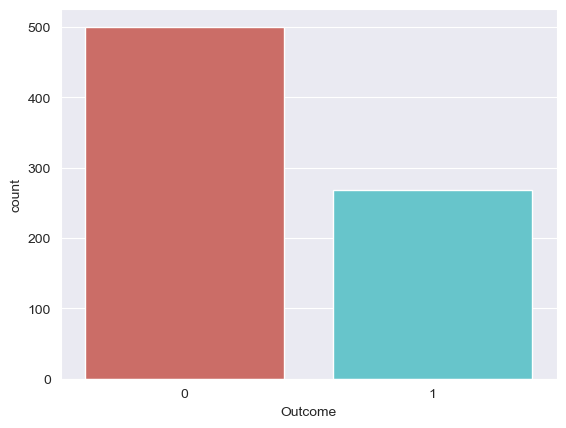

<Figure size 640x480 with 0 Axes>

In [180]:
# class distribution 
data['Outcome'].value_counts()
sns.countplot(x='Outcome', data=data, palette='hls')
plt.show()
plt.savefig('Outcome')

In [181]:
X = data.drop('Outcome', axis=1)
y = data['Outcome']

In [182]:
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

In [183]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [184]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=0)

In [185]:
X_test[0:5]

array([[-0.84488505,  2.44447821,  0.35643175,  1.40909441, -0.69289057,
         1.38436175,  2.784923  , -0.95646168],
       [-0.54791859, -0.43485916,  0.25303625,  0.59362962,  0.17539902,
         0.20401277, -0.20499449, -0.87137393],
       [ 0.04601433, -1.40507067, -0.36733675, -1.28821221, -0.69289057,
         0.25478047, -0.24425603, -0.70119842],
       [ 0.3429808 ,  1.41167241,  0.14964075, -0.09637905,  0.82661621,
        -0.78595734,  0.34768723,  1.51108316],
       [-1.14185152, -0.30967058, -0.2122435 , -1.28821221, -0.69289057,
        -0.93826044,  0.56815589, -0.19067191]])

In [186]:
y_test.head()

661    1
122    0
113    0
14     1
529    0
Name: Outcome, dtype: int64

**SVC - Basic**

In [187]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
svc= SVC()
svc.fit(X_train, y_train)
print(svc.support_vectors_)
print(svc.n_support_)
y_p = svc.predict(X_test)
acc=accuracy_score(y_test, y_p)*100
print("SVM - Accuracy: {:.3f}.".format(acc))
print("\nClassification Report")
print(classification_report(y_test, y_p))

[[-1.14185152  1.38037527  1.08020025 ...  2.57740266 -0.13553176
  -0.87137393]
 [ 1.82781311  1.8185353   0.04624525 ...  0.39439164 -0.8210987
   0.31985461]
 [ 2.7187125  -1.40507067 -0.47073225 ...  0.10247738 -0.88150107
   0.66020563]
 ...
 [ 1.23388019  1.03610667  0.45982725 ...  0.05170968 -0.08720986
   1.00055664]
 [ 1.23388019  0.12848945  1.39038675 ... -4.06047387 -0.7244549
   1.76634642]
 [ 0.93691372  1.19259239 -0.16054575 ... -0.20212881 -0.26841698
   0.23476686]]
[189 180]
SVM - Accuracy: 79.221.

Classification Report
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       107
           1       0.70      0.55      0.62        47

    accuracy                           0.79       154
   macro avg       0.76      0.73      0.74       154
weighted avg       0.78      0.79      0.78       154



**Grid Search CV without class balancing**

Grid Search sets up a grid of hyperparameter values and for each combination, trains a model and scores on the testing data. 

In [188]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from numpy import arange
grid_svc= SVC()

parameters = dict()
parameters['kernel'] = ['rbf', 'poly', 'linear', 'sigmoid']
parameters['C'] = arange(1, 10, 1)
parameters['gamma'] = ['scale', 'auto']
parameters['class_weight'] = ['dict', 'balanced']

## Building Grid Search algorithm with cross-validation and acc score.

grid_search_svc = GridSearchCV(grid_svc, parameters, scoring='accuracy', cv=5, n_jobs=-1)

grid_search_svc.fit(X_train,y_train)
best_parameters_svc = grid_search_svc.best_params_  
best_score_svc = grid_search_svc.best_score_ 
print(best_parameters_svc)
print(best_score_svc)

y_pred = grid_search_svc.predict(X_test)

# Get the accuracy score
svc_acc=accuracy_score(y_test, y_pred)*100
svc_pre=precision_score(y_test, y_pred, average='micro')
svc_recall=recall_score(y_test, y_pred, average='micro')
svc_f1_=f1_score(y_test, y_pred, average='micro')

print("\nSVM - Accuracy: {:.3f}.".format(svc_acc))
print("SVM - Precision: {:.3f}.".format(svc_pre))
print("SVM - Recall: {:.3f}.".format(svc_recall))
print("SVM - F1_Score: {:.3f}.".format(svc_f1_))
print("\nClassification Report")
print(classification_report(y_test, y_pred))

{'C': 1, 'class_weight': 'balanced', 'gamma': 'scale', 'kernel': 'linear'}
0.7492469678795148

SVM - Accuracy: 77.922.
SVM - Precision: 0.779.
SVM - Recall: 0.779.
SVM - F1_Score: 0.779.

Classification Report
              precision    recall  f1-score   support

           0       0.88      0.79      0.83       107
           1       0.61      0.74      0.67        47

    accuracy                           0.78       154
   macro avg       0.75      0.77      0.75       154
weighted avg       0.80      0.78      0.78       154



In [189]:
# Using the best params
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

svc= SVC(kernel = 'rbf', gamma = 'scale', class_weight = 'balanced', C = 5)

svc.fit(X_train, y_train)

y_p = svc.predict(X_test)

acc=accuracy_score(y_test, y_p)*100

print("SVM - Accuracy: {:.3f}.".format(acc))

print("\nClassification Report")

print(classification_report(y_test, y_p))

SVM - Accuracy: 76.623.

Classification Report
              precision    recall  f1-score   support

           0       0.88      0.77      0.82       107
           1       0.59      0.77      0.67        47

    accuracy                           0.77       154
   macro avg       0.74      0.77      0.74       154
weighted avg       0.79      0.77      0.77       154



**Random Search CV without class balancing**

Random Search sets up a grid of hyperparameter values and selects random combinations to train the model and score. 

In [190]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from numpy import arange
rand_svc= SVC()

parameters = dict()
parameters['kernel'] = ['rbf', 'poly', 'linear', 'sigmoid']
parameters['C'] = arange(1, 10, 1)
parameters['gamma'] = ['scale', 'auto']
parameters['class_weight'] = ['dict', 'balanced']

## Building Grid Search algorithm with cross-validation and acc score.

rand_search_svc = RandomizedSearchCV(rand_svc, parameters, scoring='accuracy', cv=5, n_jobs=-1)

rand_search_svc.fit(X_train,y_train)
best_parameters_svc = rand_search_svc.best_params_  
best_score_svc = rand_search_svc.best_score_ 
print(best_parameters_svc)
print(best_score_svc)

y_pred = rand_search_svc.predict(X_test)

# Get the accuracy score
svc_acc=accuracy_score(y_test, y_pred)*100
svc_pre=precision_score(y_test, y_pred, average='micro')
svc_recall=recall_score(y_test, y_pred, average='micro')
svc_f1_=f1_score(y_test, y_pred, average='micro')

print("\nSVM - Accuracy: {:.3f}.".format(svc_acc))
print("SVM - Precision: {:.3f}.".format(svc_pre))
print("SVM - Recall: {:.3f}.".format(svc_recall))
print("SVM - F1_Score: {:.3f}.".format(svc_f1_))
print("\nClassification Report")
print(classification_report(y_test, y_pred))

{'kernel': 'linear', 'gamma': 'scale', 'class_weight': 'balanced', 'C': 1}
0.7492469678795148

SVM - Accuracy: 77.922.
SVM - Precision: 0.779.
SVM - Recall: 0.779.
SVM - F1_Score: 0.779.

Classification Report
              precision    recall  f1-score   support

           0       0.88      0.79      0.83       107
           1       0.61      0.74      0.67        47

    accuracy                           0.78       154
   macro avg       0.75      0.77      0.75       154
weighted avg       0.80      0.78      0.78       154



In [191]:
# Using the best params
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

svc= SVC(kernel = 'poly', gamma = 'auto', class_weight = 'balanced', C = 1)

svc.fit(X_train, y_train)

y_p = svc.predict(X_test)

acc=accuracy_score(y_test, y_p)*100

print("SVM - Accuracy: {:.3f}.".format(acc))

print("\nClassification Report")

print(classification_report(y_test, y_p))

SVM - Accuracy: 81.169.

Classification Report
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       107
           1       0.72      0.62      0.67        47

    accuracy                           0.81       154
   macro avg       0.78      0.76      0.77       154
weighted avg       0.81      0.81      0.81       154



**Class balancing**

Counter({1: 500, 0: 500})


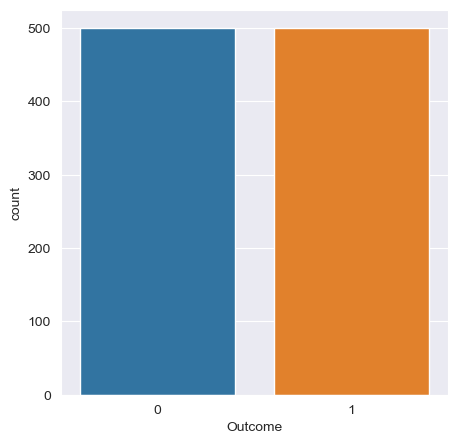

In [192]:
from collections import Counter
from imblearn.over_sampling import SMOTE
X_b, y_b = SMOTE().fit_resample(X, y)

plt.subplots(figsize=(5,5))
sns.countplot(x=y_b)
print(Counter(y_b))

In [193]:
# Split the dataset into a test and training set
X_tr, X_te, y_tr, y_te = train_test_split(X_b, y_b, test_size=0.2, random_state=0)

**Grid Search CV with class balancing**

In [194]:
from sklearn.model_selection import GridSearchCV
from numpy import arange
model_svc= SVC()


parameters = dict()
parameters['kernel'] = ['rbf', 'poly', 'linear', 'sigmoid']
parameters['C'] = arange(1, 10, 1)
parameters['gamma'] = ['scale', 'auto']
parameters['class_weight'] = ['dict', 'balanced']

## Building Grid Search algorithm with cross-validation and acc score.

grid_search_svc_2 = GridSearchCV(model_svc, parameters, scoring='accuracy', cv=5, n_jobs=-1)

## Lastly, finding the best parameters.
grid_search_svc_2.fit(X_tr, y_tr)
best_parameters_SVC_2 = grid_search_svc_2.best_params_  
best_score_SVC_2 = grid_search_svc_2.best_score_ 
print()
print(best_parameters_SVC_2)
print(best_score_SVC_2)

y_pred_2 = grid_search_svc_2.predict(X_te)

# Get the accuracy score
svc_acc_2 = accuracy_score(y_te, y_pred_2)*100
svc_pre_2 = precision_score(y_te, y_pred_2, average='micro')
svc_recall_2 = recall_score(y_te, y_pred_2, average='micro')
svc_f1_2 = f1_score(y_te, y_pred_2, average='micro')

print("\nSVM - Accuracy: {:.3f}.".format(svc_acc_2))
print("SVM - Precision: {:.3f}.".format(svc_pre_2))
print("SVM - Recall: {:.3f}.".format(svc_recall_2))
print("SVM - F1 Score: {:.3f}.".format(svc_f1_2))
print ('\n Clasification Report:\n', classification_report(y_te,y_pred_2))


{'C': 9, 'class_weight': 'balanced', 'gamma': 'scale', 'kernel': 'rbf'}
0.7662500000000001

SVM - Accuracy: 85.000.
SVM - Precision: 0.850.
SVM - Recall: 0.850.
SVM - F1 Score: 0.850.

 Clasification Report:
               precision    recall  f1-score   support

           0       0.86      0.85      0.86       105
           1       0.84      0.85      0.84        95

    accuracy                           0.85       200
   macro avg       0.85      0.85      0.85       200
weighted avg       0.85      0.85      0.85       200



In [195]:
# Using the best params
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

svc= SVC(kernel = 'rbf', gamma = 'scale', class_weight = 'balanced', C = 7)

svc.fit(X_tr, y_tr)

y_pred_2 = svc.predict(X_te)

svc_acc_2 = accuracy_score(y_te, y_pred_2)*100

print("SVM - Accuracy: {:.3f}.".format(svc_acc_2))

print("\nClassification Report")

print(classification_report(y_te, y_pred_2))

SVM - Accuracy: 85.500.

Classification Report
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       105
           1       0.84      0.86      0.85        95

    accuracy                           0.85       200
   macro avg       0.85      0.86      0.85       200
weighted avg       0.86      0.85      0.86       200



**Random Search CV with class balancing**

In [196]:
from sklearn.model_selection import RandomizedSearchCV
from numpy import arange
model_svc= SVC()

parameters = dict()
parameters['kernel'] = ['rbf', 'poly', 'linear', 'sigmoid']
parameters['C'] = arange(1, 10, 1)
parameters['gamma'] = ['scale', 'auto']
parameters['class_weight'] = ['dict', 'balanced']

## Building Random Search algorithm with cross-validation and acc score.

rand_search_svc_2 = RandomizedSearchCV(model_svc, parameters, scoring='accuracy', cv=5, n_jobs=-1)

## Lastly, finding the best parameters.
rand_search_svc_2.fit(X_tr, y_tr)
best_parameters_SVC_2 = rand_search_svc_2.best_params_  
best_score_SVC_2 = rand_search_svc_2.best_score_ 
print()
print(best_parameters_SVC_2)
print(best_score_SVC_2)

y_pred_2 = rand_search_svc_2.predict(X_te)

# Get the accuracy score
lr_acc_2 = accuracy_score(y_te, y_pred_2)*100
lr_pre_2 = precision_score(y_te, y_pred_2, average='micro')
lr_recall_2 = recall_score(y_te, y_pred_2, average='micro')
lr_f1_2 = f1_score(y_te, y_pred_2, average='micro')

print("\nSVM - Accuracy: {:.3f}.".format(lr_acc_2))
print("SVM - Precision: {:.3f}.".format(lr_pre_2))
print("SVM - Recall: {:.3f}.".format(lr_recall_2))
print("SVM - F1 Score: {:.3f}.".format(lr_f1_2))
print ('\n Clasification Report:\n', classification_report(y_te,y_pred_2))


{'kernel': 'rbf', 'gamma': 'auto', 'class_weight': 'balanced', 'C': 7}
0.75875

SVM - Accuracy: 85.500.
SVM - Precision: 0.855.
SVM - Recall: 0.855.
SVM - F1 Score: 0.855.

 Clasification Report:
               precision    recall  f1-score   support

           0       0.87      0.85      0.86       105
           1       0.84      0.86      0.85        95

    accuracy                           0.85       200
   macro avg       0.85      0.86      0.85       200
weighted avg       0.86      0.85      0.86       200



In [197]:
# Using the best params
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

svc= SVC(kernel = 'rbf', gamma = 'scale', class_weight = 'balanced', C = 7)

svc.fit(X_tr, y_tr)

y_pred_2 = svc.predict(X_te)

svc_acc_2 = accuracy_score(y_te, y_pred_2)*100

print("SVM - Accuracy: {:.3f}.".format(svc_acc_2))

print("\nClassification Report")

print(classification_report(y_te, y_pred_2))

SVM - Accuracy: 85.500.

Classification Report
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       105
           1       0.84      0.86      0.85        95

    accuracy                           0.85       200
   macro avg       0.85      0.86      0.85       200
weighted avg       0.86      0.85      0.86       200

